In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylops

import pyproximal

plt.close('all')

In [2]:
m = np.array([1, 0])
G = np.array([[10., 9.],
              [9., 10.]])
d = np.dot(G, m)

In [3]:
nm1, nm2 = 201, 201
m_min, m_max = (m[0] - 5, m[1] - 5), (m[0] + 5, m[1] + 5)
m1, m2 = np.linspace(m_min[0], m_max[0], nm1), \
         np.linspace(m_min[1], m_max[1], nm2)
m1, m2 = np.meshgrid(m1, m2, indexing='ij')
mgrid = np.vstack((m1.ravel(), m2.ravel()))
J = 0.5 * np.sum(mgrid * np.dot(G, mgrid), axis=0) - np.dot(d, mgrid)
J = J.reshape(nm1, nm2)

In [4]:
J

array([[470.    , 465.2625, 460.55  , ...,  19.55  ,  19.7625,  20.    ],
       [465.2625, 460.5475, 455.8575, ...,  19.2675,  19.5025,  19.7625],
       [460.55  , 455.8575, 451.19  , ...,  19.01  ,  19.2675,  19.55  ],
       ...,
       [ 19.55  ,  19.2675,  19.01  , ..., 451.19  , 455.8575, 460.55  ],
       [ 19.7625,  19.5025,  19.2675, ..., 455.8575, 460.5475, 465.2625],
       [ 20.    ,  19.7625,  19.55  , ..., 460.55  , 465.2625, 470.    ]])

In [5]:
lower = 1.5
upper = 3
indic = (mgrid > lower) & (mgrid < upper)
indic = indic[0].reshape(nm1, nm2) & indic[1].reshape(nm1, nm2)

In [6]:
indic

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
l2 = pyproximal.L2(Op=pylops.MatrixMult(G), b=d, niter=2)
ind = pyproximal.Box(lower, upper)

In [8]:
l2

In [9]:
ind

In [10]:
def callback(x):
    mhist.append(x)

m0 = np.array([4, 3])

mhist = [m0,]
minv_slow = pyproximal.optimization.primal.ProximalGradient(l2, ind,
                                                            tau=0.0005,
                                                            x0=m0, epsg=1.,
                                                            niter=10,
                                                            callback=callback)
mhist_slow = np.array(mhist)

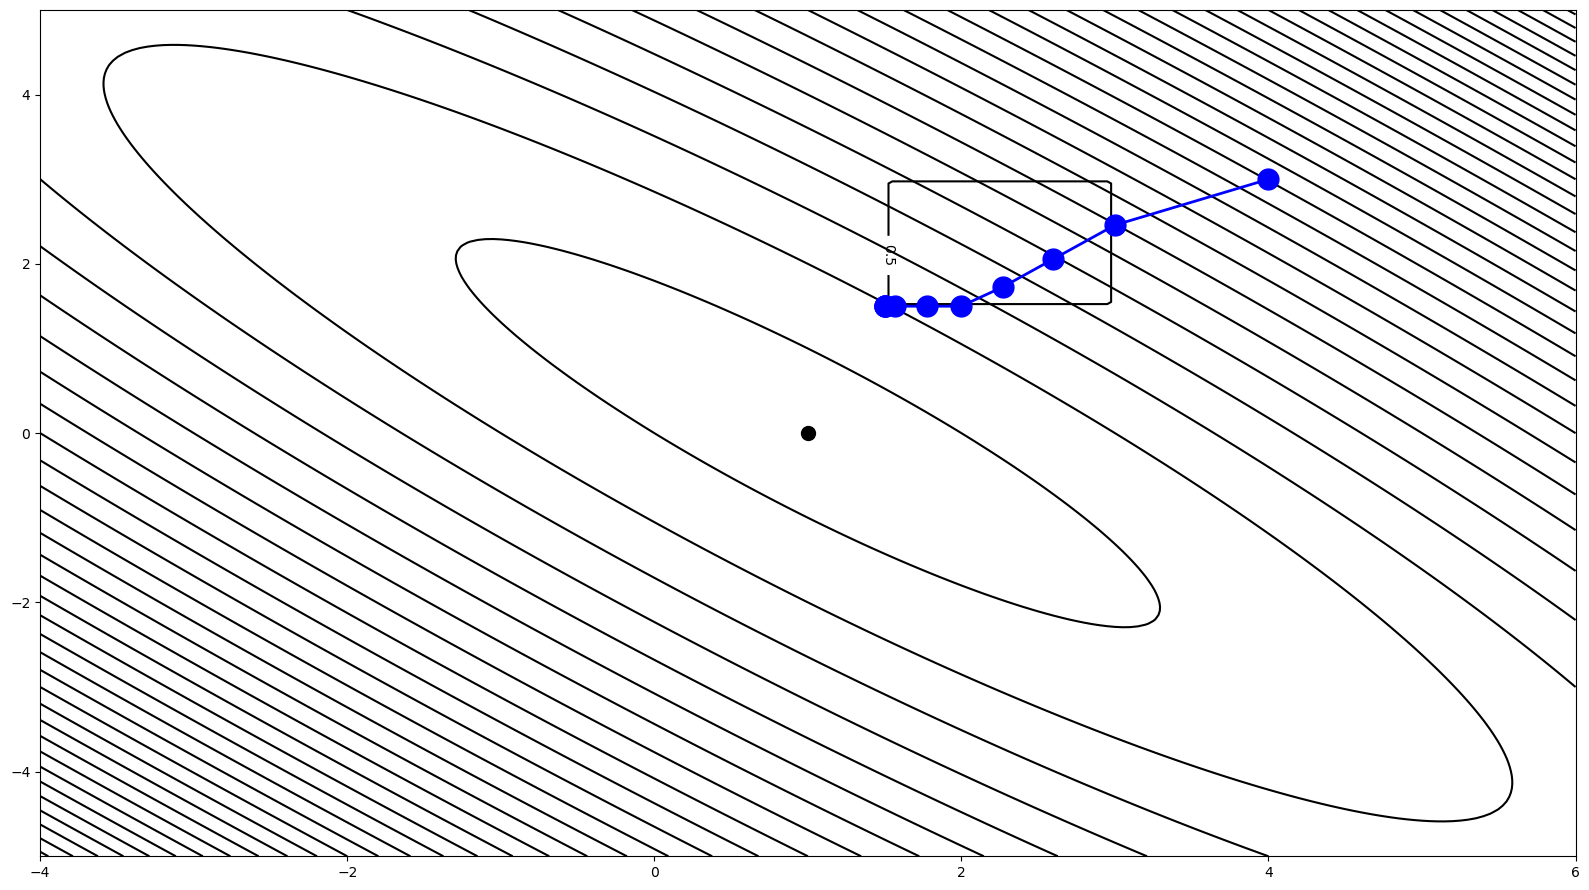

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
cs = ax.contour(m1, m2, J, levels=40, colors='k')
cs = ax.contour(m1, m2, indic, colors='k')
ax.clabel(cs, inline=1, fontsize=10)
ax.plot(m[0], m[1], '.k', ms=20)
ax.plot(m0[0], m0[1], '.r', ms=20)
ax.plot(mhist_slow[:, 0], mhist_slow[:, 1], '.-b', ms=30, lw=2)
# ax.plot(mhist_opt[:, 0], mhist_opt[:, 1], '.-m', ms=30, lw=4)
# ax.plot(mhist_back[:, 0], mhist_back[:, 1], '.-g', ms=10, lw=2)
plt.tight_layout()

In [12]:
import pandas as pd

In [13]:
er = pd.read_csv('er.csv', index_col=0)
cov = pd.read_csv('cov.csv', index_col=0)

In [14]:
er

,Return
AxiomaID,
YUB73JLH6,0.042080
Q8L3JXGU1,0.013244
MCMGWV5N3,0.018852
Y1SWVDLV8,0.012332
M5NTDJFX4,0.014677
H2CMWN4M0,0.022189
ZUVYVKJ59,-0.009016
NU6R8GTD2,-0.005389
KL1VNCXK2,-0.006110


In [15]:
cov

,YUB73JLH6,Q8L3JXGU1,MCMGWV5N3,Y1SWVDLV8,M5NTDJFX4,H2CMWN4M0,ZUVYVKJ59,NU6R8GTD2,KL1VNCXK2,A42BM7MP7,TQ9DQQMC0,RH9MZ4QT0
AxiomaID,,,,,,,,,,,,
YUB73JLH6,0.307294,0.047258,0.070951,0.047402,0.054872,0.056184,0.042796,0.057936,0.054422,0.051324,0.054601,0.053779
Q8L3JXGU1,0.047258,0.069603,0.045754,0.032304,0.033680,0.035468,0.029476,0.028966,0.027260,0.022426,0.032869,0.024916
MCMGWV5N3,0.070951,0.045754,0.184532,0.043862,0.047948,0.048047,0.042034,0.048803,0.045813,0.036976,0.059234,0.048009
Y1SWVDLV8,0.047402,0.032304,0.043862,0.090627,0.038012,0.036253,0.026629,0.035164,0.033005,0.021201,0.030882,0.027854
M5NTDJFX4,0.054872,0.033680,0.047948,0.038012,0.100522,0.039268,0.029897,0.046003,0.043572,0.025404,0.036845,0.031840
H2CMWN4M0,0.056184,0.035468,0.048047,0.036253,0.039268,0.131643,0.025715,0.032961,0.031078,0.023835,0.031403,0.027613
ZUVYVKJ59,0.042796,0.029476,0.042034,0.026629,0.029897,0.025715,0.081000,0.057603,0.055910,0.047799,0.062838,0.052584
NU6R8GTD2,0.057936,0.028966,0.048803,0.035164,0.046003,0.032961,0.057603,0.146213,0.076984,0.054097,0.070604,0.062934
KL1VNCXK2,0.054422,0.027260,0.045813,0.033005,0.043572,0.031078,0.055910,0.076984,0.139950,0.052578,0.068357,0.060694


Simple MVO ADMM

In [16]:
import pyproximal as prox

In [17]:
Sigma = 1e+0 * cov.values * 2
mu = -1 * er.values.ravel()

fx = prox.Quadratic(Op=pylops.MatrixMult(Sigma), b=mu)
fy = prox.Simplex(len(mu), 1.0, engine='numba')

x0 = np.zeros(shape=mu.shape)

In [48]:
from tqdm.auto import tqdm
xinv_admm = pyproximal.optimization.primal.ADMM(fx, fy,
                                            tau=1.,
                                            x0=x0,
                                            niter=200, show=False)
np.round(xinv_admm[0], 3)*100

array([ 3. , 31.8,  0.9, 18.7, 14.7, 13.8,  1.4,  0. ,  0. , 15.6,  0. ,
        0.1])

Robo Advisor Optimization

we don't use pyproximal.ADMM

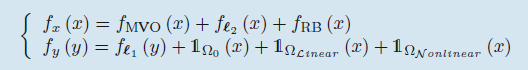

x update: CCD  
y update: Dykstra

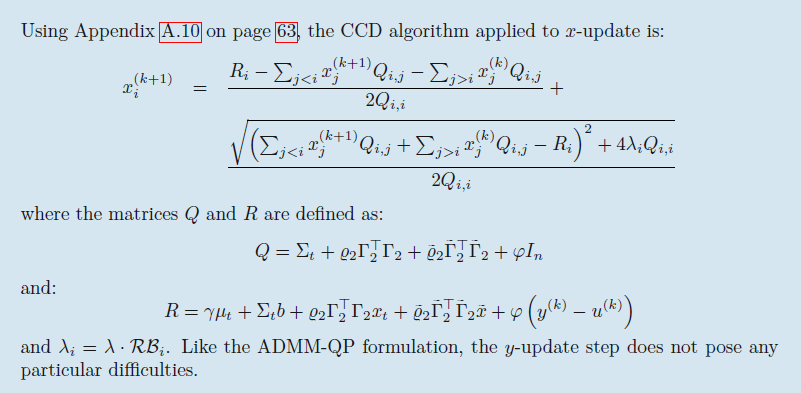

In [18]:
fy.prox(x=mu, tau=1.0)

array([0.04885997, 0.07769644, 0.07208828, 0.07860822, 0.07626319,
       0.06875127, 0.09995665, 0.0963293 , 0.09704985, 0.09194857,
       0.09640758, 0.09604071])

In [19]:
mu

array([-0.04208035, -0.01324388, -0.01885204, -0.0123321 , -0.01467713,
       -0.02218905,  0.00901633,  0.00538898,  0.00610953,  0.00100825,
        0.00546726,  0.00510039])

In [20]:
np.linalg.inv(Sigma)

array([[ 2.05756808e+00, -5.02690576e-01, -2.58463296e-01,
        -2.86476269e-01, -3.68138233e-01, -3.11445282e-01,
         5.12234139e-02, -1.36773368e-01, -1.06840344e-01,
        -4.72274704e-01, -4.24012430e-02, -1.49874791e-02],
       [-5.02690576e-01,  1.09880869e+01, -1.08623778e+00,
        -1.61163660e+00, -1.36322752e+00, -1.17607199e+00,
        -1.83950786e+00,  2.13813197e-01,  2.49411892e-01,
        -3.91953273e-02, -3.01711341e-01,  1.46447729e-02],
       [-2.58463296e-01, -1.08623778e+00,  3.76508224e+00,
        -5.49715590e-01, -5.35238481e-01, -4.10962975e-01,
        -3.14538309e-01, -8.00629751e-02, -3.68748782e-02,
        -1.21392663e-01, -5.49921898e-01, -2.78489178e-02],
       [-2.86476269e-01, -1.61163660e+00, -5.49715590e-01,
         7.68926665e+00, -1.24872669e+00, -7.61965989e-01,
        -3.69299857e-01, -3.96563852e-01, -3.35864506e-01,
         1.52815465e-01,  2.91387131e-05, -1.39151017e-02],
       [-3.68138233e-01, -1.36322752e+00, -5.3523848